In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import torch.optim as optim


На вход задан временной ряд $ y = A sin(b*x) $  
### Задача 1 (регрессия):  
По значениям временного ряда предсказать параметры $A$ и $b$  
### Зачада 2 (авторегрессия):
По значениям временного ряда предсказать 5 следующих значений


Генерация данных: подзадача. Переписать функцию gen_data() так, чтобы она возвращала batch данных в формате torch.tensor

In [2]:
x = np.arange(0,10,step=0.1)
def gen_data():
    a = np.random.uniform(0.1,3)
    b = np.random.uniform(0.2,4)
    return a*np.sin(b*x)

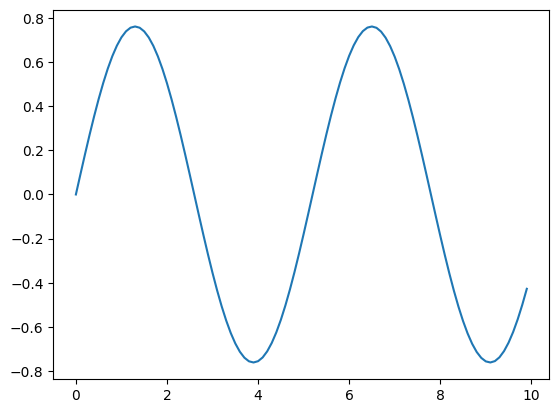

In [3]:
plt.plot(x,gen_data())


Нейросеть

In [7]:
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LSTM, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim,2)

    def forward(self, x):
        # Инициализация скрытого состояния LSTM слоёв
        
        h0 = torch.zeros(self.num_layers , x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        
        # Применение LSTM слоя
        _, (out,_) = self.lstm(x, (h0, c0))

        out = self.fc(out[0])

        return out

Генерация батча данных произвольной (случайной) длины и случайными значениями искомых параметров $A$ и $b$

In [39]:

def gen_data(batch = 16):
    t = np.arange(0,torch.randint(3,15,(1,)),step=0.1)
    X = torch.zeros(batch,t.size,1)
    Y = torch.zeros(batch,2)
    for i in range(batch):
        a = torch.rand(1)*3 + 0.1
        b = torch.rand(1)*4 + 0.2
        #X[i,:,0] =  torch.tensor(t)
        X[i,:,0] =  a*np.sin(b*t)
        Y[i,0],Y[i,1] = a,bф
    return X,Y

In [40]:
input_dim = 1
hidden_dim = 128
num_layers = 1


model = LSTM(input_dim, hidden_dim, num_layers)

device = torch.device("cuda:0")
model.to(device)
#model.load_state_dict(torch.load('models/bilstm_1_128'))
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [41]:

# Обучение модели
s = []
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    x,y = gen_data(batch=32)
    output = model(x.to(device))
    
    loss = criterion(output, y.to(device))  # Используем только первый измерение для задачи регрессии
    loss.backward()
    optimizer.step()
    s.append(loss.detach().to('cpu'))
    if (epoch + 1) % 50 == 0:
       # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        S = np.mean(s)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {S:.4f}')
        #run.log({"loss": loss})
        s = []

    if (epoch + 1) % 100 == 0:
        torch.save(model.state_dict(), 'lstm_1_128')


Epoch [50/10000], Loss: 2.0935
Epoch [100/10000], Loss: 1.0321
Epoch [150/10000], Loss: 0.9205
Epoch [200/10000], Loss: 0.7490
Epoch [250/10000], Loss: 0.6350
Epoch [300/10000], Loss: 0.6218
Epoch [350/10000], Loss: 0.4111
Epoch [400/10000], Loss: 0.3899
Epoch [450/10000], Loss: 0.1813
Epoch [500/10000], Loss: 0.1328
Epoch [550/10000], Loss: 0.0770
Epoch [600/10000], Loss: 0.0408
Epoch [650/10000], Loss: 0.0294
Epoch [700/10000], Loss: 0.1348
Epoch [750/10000], Loss: 0.1682
Epoch [800/10000], Loss: 0.0849
Epoch [850/10000], Loss: 0.0273
Epoch [900/10000], Loss: 0.0203
Epoch [950/10000], Loss: 0.0333
Epoch [1000/10000], Loss: 0.0255
Epoch [1050/10000], Loss: 0.1758
Epoch [1100/10000], Loss: 0.0773
Epoch [1150/10000], Loss: 0.0257
Epoch [1200/10000], Loss: 0.0135
Epoch [1250/10000], Loss: 0.0157
Epoch [1300/10000], Loss: 0.0177
Epoch [1350/10000], Loss: 0.0120
Epoch [1400/10000], Loss: 0.0106
Epoch [1450/10000], Loss: 0.0096
Epoch [1500/10000], Loss: 0.0068
Epoch [1550/10000], Loss: 0.00

Инференс

In [14]:
model = LSTM(input_dim, hidden_dim, num_layers)
model.load_state_dict(torch.load('lstm_1_128'))
model.to('cpu')

LSTM(
  (lstm): LSTM(1, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [15]:
def gen_data(batch = 16):
    X = torch.zeros(batch,t.size,1)
    Y = torch.zeros(batch,2)
    for i in range(batch):
        a = torch.rand(1)*3 + 0.1
        b = torch.rand(1)*4 + 0.2
        #X[i,:,0] =  torch.tensor(t)
        X[i,:,0] =  a*np.sin(b*t)
        Y[i,0],Y[i,1] = a,b
    return X,Y,a,b

Проверка решения

In [17]:
x,y,a,b = gen_data(batch=1)
output = model(x)
output.detach_()
print(a,b,output)

tensor([1.2395]) tensor([2.5549]) tensor([[1.2502, 2.5577]])


Задача 2: авторегрессия

Генерация данных

In [7]:

def gen_data(batch = 16):
    t = np.arange(0,torch.randint(3,15,(1,)),step=0.1)
    X = torch.zeros(batch,t.size-1,1)
    Y = torch.zeros(batch,t.size-1,1)
    for i in range(batch):
        a = torch.rand(1)*3 + 0.1
        b = torch.rand(1)*4 + 0.2
        #X[i,:,0] =  torch.tensor(t)
        y = a*np.sin(b*t)
        X[i,:,0] =  y[:-1]
        Y[i,:,0] = y[1:]
    return X,Y

Нейросеть

In [19]:
import torch.nn as nn
class LSTM2(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LSTM2, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim,1)

    def forward(self, x):
        # Инициализация скрытого состояния LSTM слоёв
        
        h0 = torch.zeros(self.num_layers , x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        
        # Применение LSTM слоя
        out, _ = self.lstm(x, (h0, c0))

        out = self.fc(out)

        return out

In [20]:
input_dim = 1
hidden_dim = 128
num_layers = 1


model = LSTM2(input_dim, hidden_dim, num_layers)

device = torch.device("cpu")
model.to(device)
#model.load_state_dict(torch.load('models/bilstm_1_128'))
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
s = []
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    x,y = gen_data(batch=32)
    output = model(x.to(device))
    
    loss = criterion(output, y.to(device))  # Используем только первый измерение для задачи регрессии
    loss.backward()
    optimizer.step()
    s.append(loss.detach().to('cpu'))
    if (epoch + 1) % 50 == 0:
       # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        S = np.mean(s)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {S:.4f}')
        #run.log({"loss": loss})
        s = []

    if (epoch + 1) % 100 == 0:
        torch.save(model.state_dict(), 'lstm_1_128')


Epoch [50/1000], Loss: 0.7469
Epoch [100/1000], Loss: 0.0580
Epoch [150/1000], Loss: 0.0303
Epoch [200/1000], Loss: 0.0166
Epoch [250/1000], Loss: 0.0147
Epoch [300/1000], Loss: 0.0111
Epoch [350/1000], Loss: 0.0102
Epoch [400/1000], Loss: 0.0081
Epoch [450/1000], Loss: 0.0086
Epoch [500/1000], Loss: 0.0071
Epoch [550/1000], Loss: 0.0068
Epoch [600/1000], Loss: 0.0076
Epoch [650/1000], Loss: 0.0069
Epoch [700/1000], Loss: 0.0059
Epoch [750/1000], Loss: 0.0054
Epoch [800/1000], Loss: 0.0054
Epoch [850/1000], Loss: 0.0051
Epoch [900/1000], Loss: 0.0041
Epoch [950/1000], Loss: 0.0045
Epoch [1000/1000], Loss: 0.0056


Инференс

In [28]:
x,y = gen_data(batch = 1)
output = model(x.to(device))

In [30]:
y = y.squeeze(0)
output = output.detach().squeeze(0)


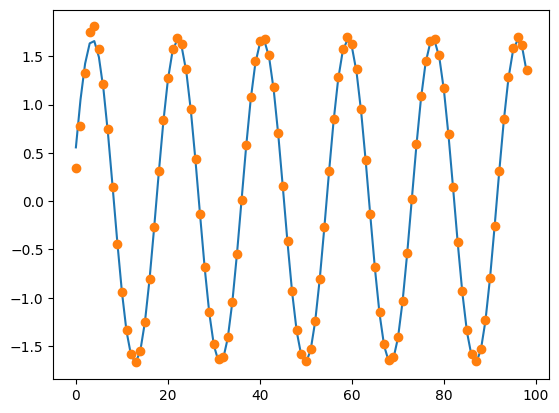

In [31]:
plt.plot(y)
plt.plot(output,'o')

Ошибка предсказания

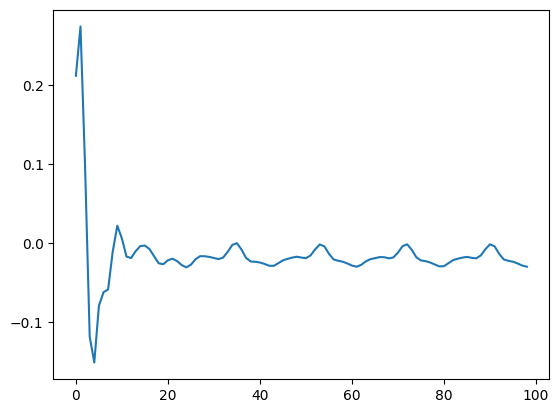

In [32]:
plt.plot(y - output )
